In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval
from efficientnet.keras import center_crop_and_resize
import cv2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("dataset_70k_clean.csv")
df_train = pd.read_csv("dataset_70k_clean_train.csv")
df_val = pd.read_csv("dataset_70k_clean_val.csv")

In [3]:
def convert_category(df):
    df.loc[:, "rock_category_clean"] = df[["rock_category_clean"]].apply(lambda x: literal_eval(x.values[0]), axis=1)

In [4]:
convert_category(df)
convert_category(df_train)
convert_category(df_val)

In [5]:
def read_num_cat(df):

    categories = set()
    for c in df["rock_category_clean"]:
        categories |= c

    print(len(categories))
    print(categories)
    df.loc[:, "num_cat"] = df[["rock_category_clean"]].apply(lambda x : len(x.values[0]), axis=1)

    count_cat = {}
    for c in categories:
        count_cat[c] = 0

    for row in df.itertuples():
        for c in row.rock_category_clean:
            count_cat[c] += 1
        
    print(count_cat)
    df[["num_cat"]].plot.hist(bins=12)
    
    return count_cat

In [6]:
def plot_cat_repartition(count_cat):
    label = []
    count = []
    for l, c in count_cat.items():
        label.append(l)
        count.append(c)
    
    label_idx = [idx for idx, _ in enumerate(label)]

    fig, ax = plt.subplots(figsize=(30, 15))
    ax.bar(label_idx, count, align='center')
    ax.set_xticks(label_idx)
    ax.set_ylabel("Count")

81
{'granodiorite', 'monzonite', 'evaporite', 'limestone', 'greenstone', 'quartz', 'kersantite', 'eclogite', 'phyllite', 'psammite', 'paragneiss', 'agglomerate', 'marble', 'syenite', 'porphyrite', 'ironstone', 'hornblendite', 'flint', 'latite', 'metamudstone', 'flagstone', 'siderite', 'dolerite', 'gneiss', 'norite', 'claystone', 'grain', 'dolostone', 'essexite', 'basalt', 'calcsilicate', 'metadiorite', 'rhyolite', 'mylonite', 'gabbro', 'keratophyre', 'migmatite', 'oolite', 'lamprophyre', 'chalk', 'tuff', 'mudstone', 'siltstone', 'sandstone', 'granulite', 'peridotite', 'dolomite', 'phosphorite', 'clastic', 'quartzite', 'hornfels', 'diorite', 'amphibolite', 'mugearite', 'dunite', 'phonolite', 'pegmatite', 'conglomerate', 'tuffite', 'pumice', 'granite', 'elvan', 'metadolostone', 'serpentinite', 'porphyry', 'dacite', 'chert', 'silt', 'slate', 'breccia', 'spessartite', 'tonalite', 'skarn', 'schist', 'trachyte', 'andesite', 'rhyodacite', 'gravel', 'anorthosite', 'shale', 'microgranite'}
{'gr

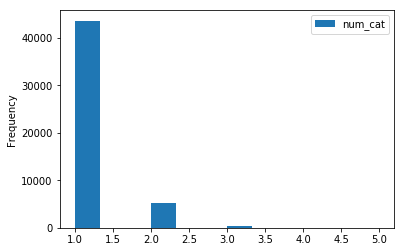

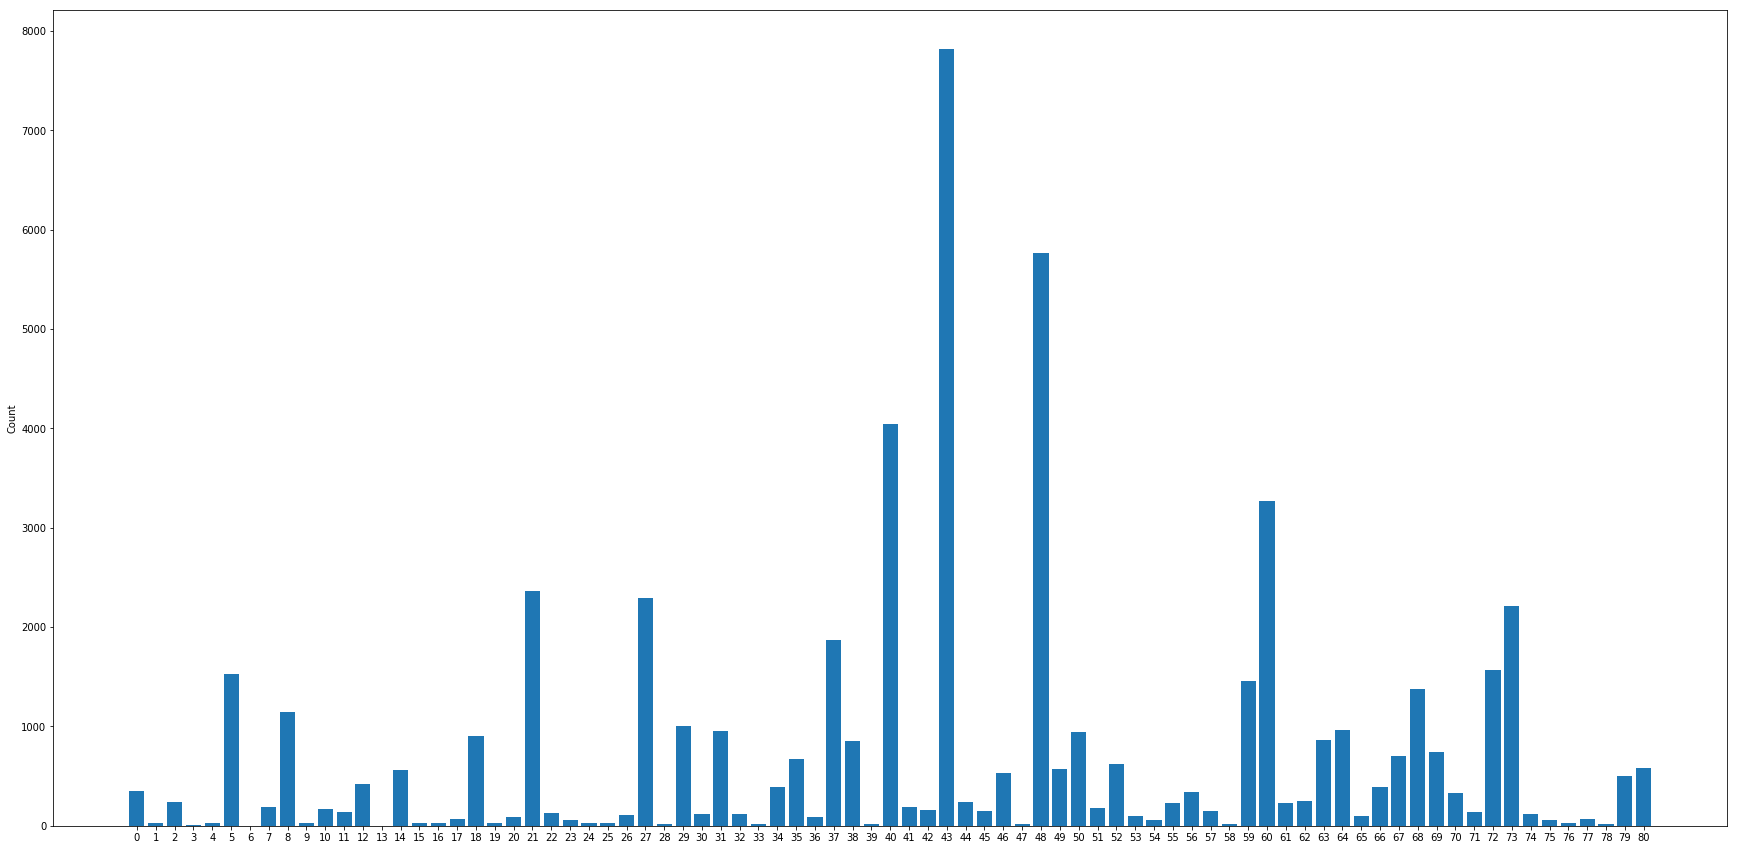

In [7]:
tot_count_cat = read_num_cat(df)
plot_cat_repartition(tot_count_cat)

78
{'granodiorite', 'monzonite', 'limestone', 'greenstone', 'quartz', 'kersantite', 'phyllite', 'psammite', 'paragneiss', 'agglomerate', 'marble', 'syenite', 'porphyrite', 'ironstone', 'hornblendite', 'flint', 'latite', 'metamudstone', 'flagstone', 'siderite', 'dolerite', 'gneiss', 'norite', 'claystone', 'calcsilicate', 'dolostone', 'grain', 'basalt', 'essexite', 'metadiorite', 'rhyolite', 'migmatite', 'gabbro', 'keratophyre', 'mylonite', 'oolite', 'lamprophyre', 'chalk', 'mudstone', 'tuff', 'siltstone', 'sandstone', 'granulite', 'peridotite', 'dolomite', 'clastic', 'quartzite', 'hornfels', 'diorite', 'amphibolite', 'mugearite', 'phonolite', 'dunite', 'pegmatite', 'conglomerate', 'tuffite', 'pumice', 'granite', 'elvan', 'metadolostone', 'serpentinite', 'porphyry', 'dacite', 'chert', 'silt', 'slate', 'breccia', 'spessartite', 'tonalite', 'skarn', 'schist', 'trachyte', 'andesite', 'rhyodacite', 'gravel', 'anorthosite', 'shale', 'microgranite'}
{'granodiorite': 297, 'monzonite': 22, 'gree

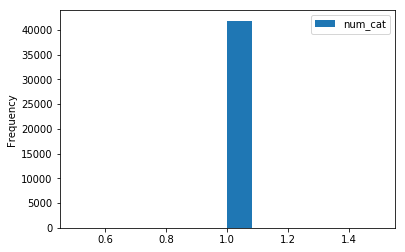

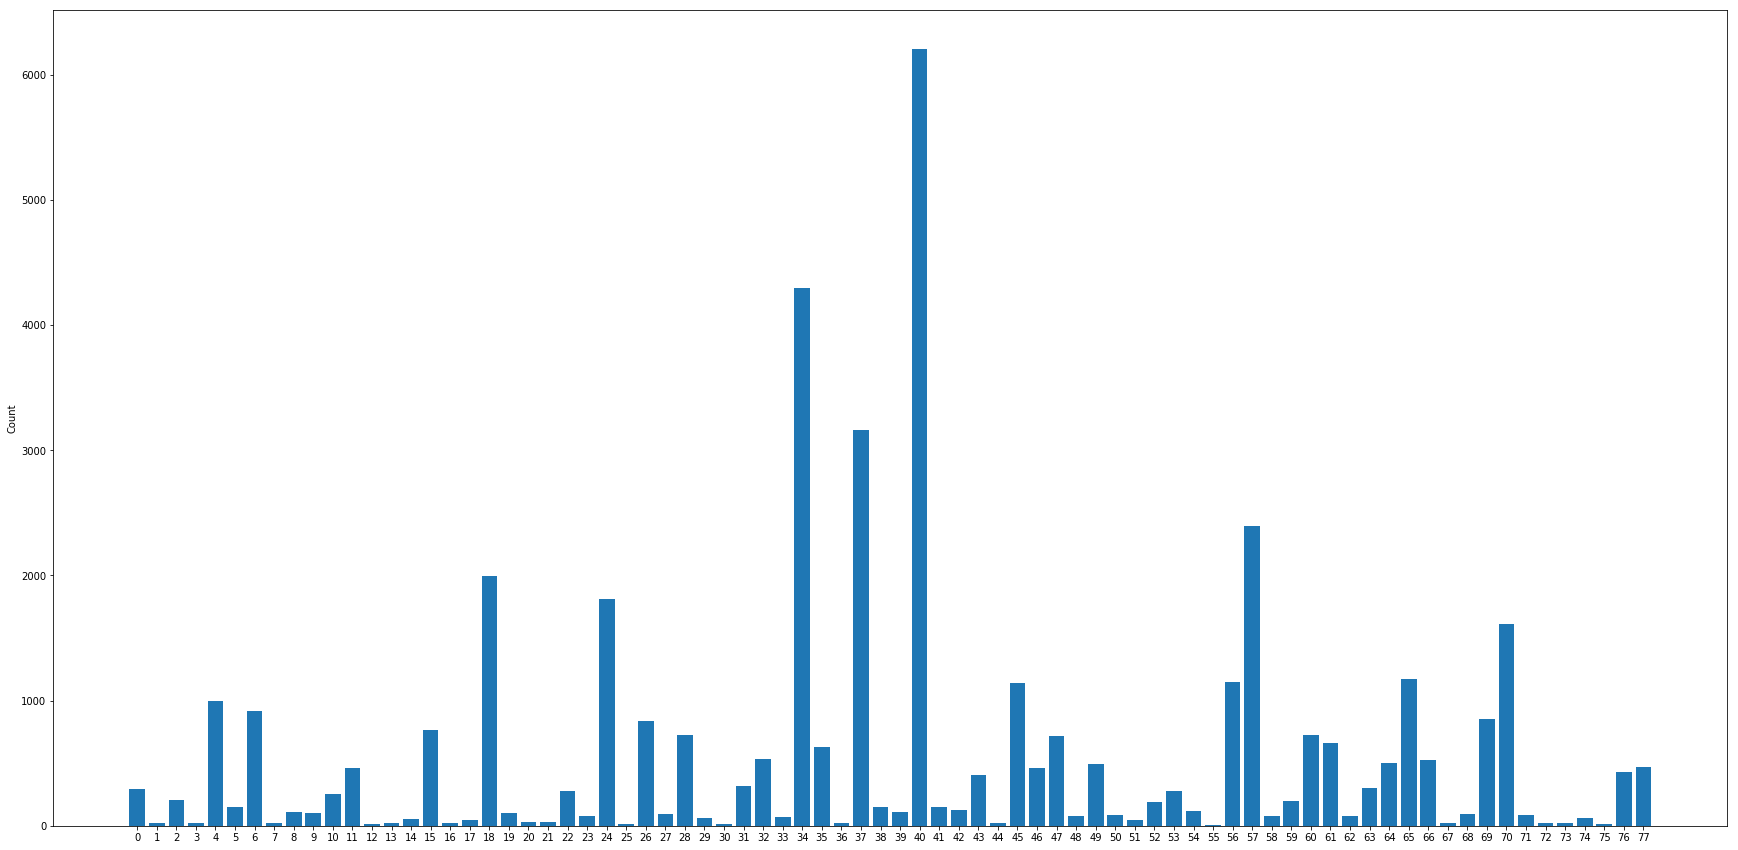

In [8]:
train_count_cat = read_num_cat(df_train)
plot_cat_repartition(train_count_cat)

78
{'granodiorite', 'monzonite', 'limestone', 'greenstone', 'quartz', 'kersantite', 'phyllite', 'psammite', 'paragneiss', 'agglomerate', 'marble', 'syenite', 'porphyrite', 'ironstone', 'hornblendite', 'flint', 'latite', 'metamudstone', 'flagstone', 'siderite', 'dolerite', 'gneiss', 'norite', 'grain', 'calcsilicate', 'claystone', 'dolostone', 'basalt', 'essexite', 'metadiorite', 'rhyolite', 'mylonite', 'gabbro', 'keratophyre', 'migmatite', 'oolite', 'lamprophyre', 'chalk', 'tuff', 'mudstone', 'siltstone', 'sandstone', 'granulite', 'peridotite', 'dolomite', 'clastic', 'quartzite', 'hornfels', 'diorite', 'amphibolite', 'mugearite', 'dunite', 'phonolite', 'pegmatite', 'conglomerate', 'tuffite', 'pumice', 'granite', 'elvan', 'metadolostone', 'serpentinite', 'dacite', 'porphyry', 'chert', 'silt', 'slate', 'breccia', 'spessartite', 'tonalite', 'skarn', 'trachyte', 'schist', 'andesite', 'rhyodacite', 'gravel', 'anorthosite', 'shale', 'microgranite'}
{'granodiorite': 52, 'monzonite': 4, 'greens

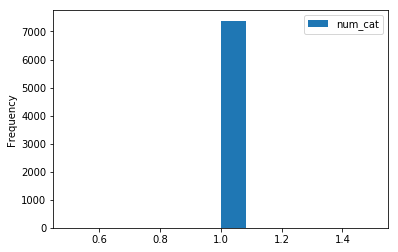

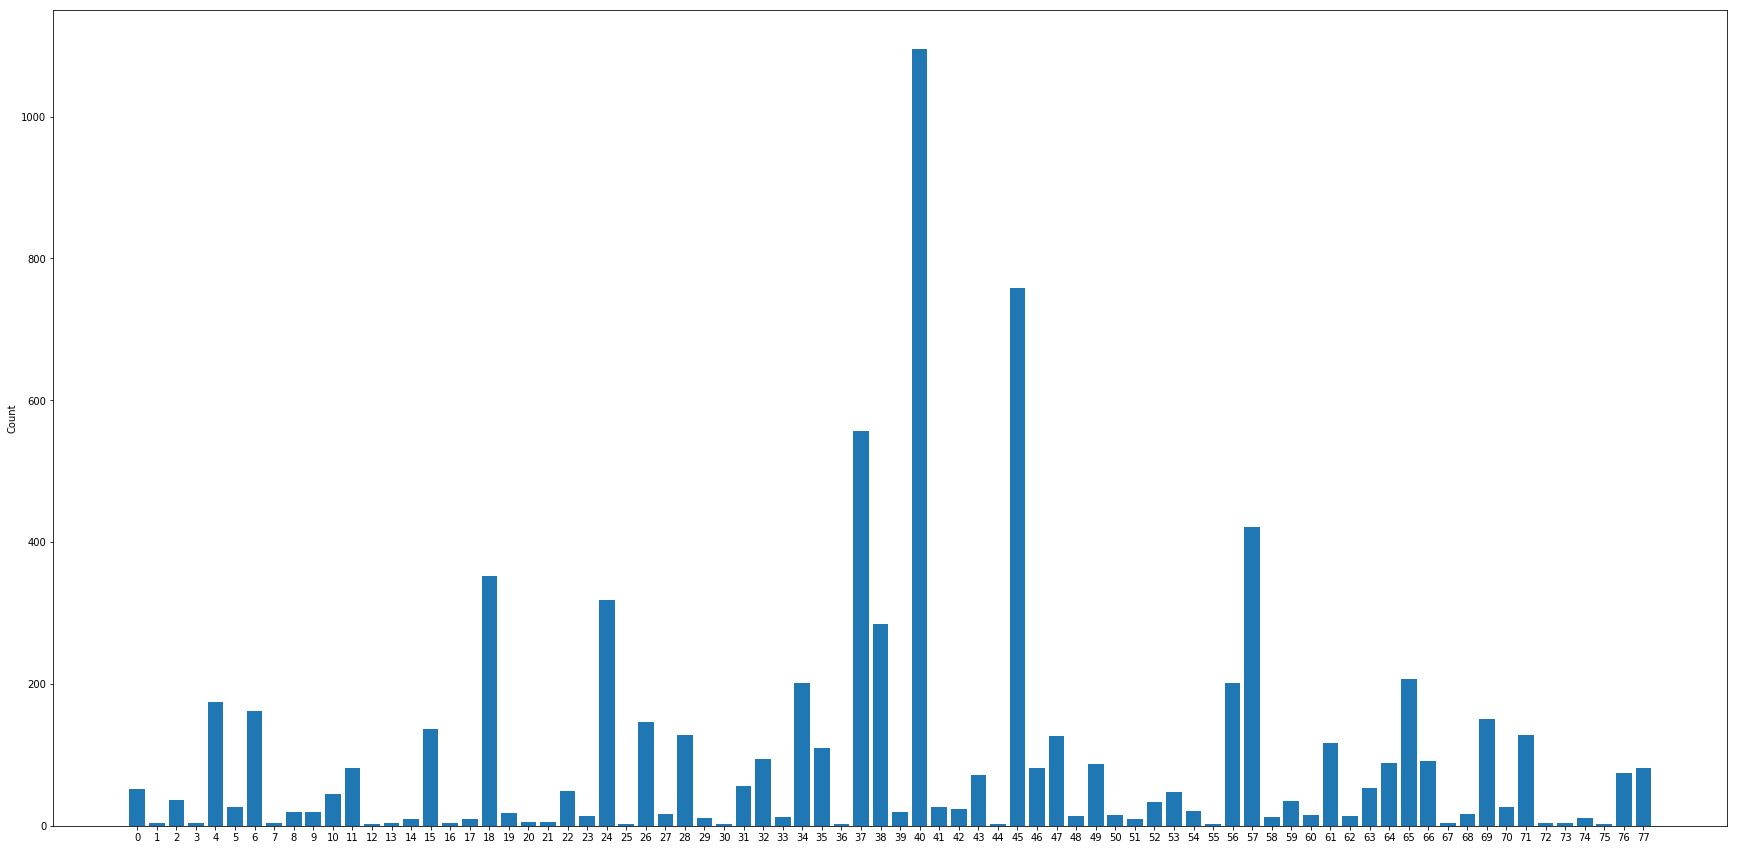

In [9]:
val_count_cat = read_num_cat(df_val)
plot_cat_repartition(val_count_cat)